In [52]:
import yfinance as yf
import talib as ta
import matplotlib.pyplot as plt 
import plotly.express as px 

In [53]:
# Import Dataset and useful libraries 
import os 
import pandas as pd
import numpy as np  
import utils as util
os.chdir('../scripts/')

names = ["AAPL","AMZN","GOOG","META","MSFT","NVDA","TSLA"]
data = {}
for name in names:
    data_path = f"../../data/week1/yfinance_data/{name}_historical_data.csv"
    data[name] = util.read_csv_file(data_path).get("data")

for name in names:
    print("-"*10)
    print(name)
    print(data[name].tail())
    print("-"*10)


----------
AAPL
             Date        Open        High         Low       Close   Adj Close  \
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

         Volume  Dividends  Stock Splits  
10993  61777600        0.0           0.0  
10994  51391200        0.0           0.0  
10995  41601300        0.0           0.0  
10996  36311800        0.0           0.0  
10997  41643800        0.0           0.0  
----------
----------
AMZN
            Date        Open        High         Low       Close   Adj Close  \
6841  2024-07-24  183.199997  185.449997  180.410004  180.830002  180.830002   
6842  2024-07-25  182.910004  183.899994  176.800003

In [54]:
# helper functions 
def print_last(data,x=5):
    for name in names:
        print("-"*10)
        print(name)
        print(data[name].tail(x))
        print("-"*10)
    

## Analysis Indicators with TA-Lib
# 
#### In the following part I try to calculate technical indicators for each stock. since this is for educational perpose I will specifically work on TESLA data 

### Simple Moving Average (SMA)
#
Purpose: Smooth's Price data to identify trends 
#
Usage: to identify long-term trends 

In [55]:

indicators = {}

for name in names:
    df = data[name]

    # Calculate a 50-period simple moving average 
    df['SMA_50'] = ta.SMA(df['Close'], timeperiod=50)

    # Calculate a 200-period simple moving average 
    df['SMA_200'] = ta.SMA(df['Close'], timeperiod=200)

    indicators[name] = df

# desplay the last data after modification 
indicators[name].tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200
3535,2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800,0.0,0.0,195.6922,205.57725
3536,2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000,0.0,0.0,196.9816,205.57230
3537,2024-07-19,247.789993,249.440002,236.830002,239.199997,239.199997,87403900,0.0,0.0,198.2094,205.51030
3538,2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400,0.0,0.0,199.7452,205.53520
3539,2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200,0.0,0.0,201.2334,205.46130
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,202.1838,205.24100
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,203.1510,205.03960
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,203.9960,204.84025
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,205.1582,204.68265
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,206.1138,204.48080


> ### Analysis of SMA Results 
#### Trend Identification 
- If the SMA_50 is above the SMA_200, it typically indicates a bullish trend, suggesting that the stock's price is increasing.
- Conversely, if the SMA_50 is below the SMA_200, it indicates a bearish trend, suggesting that the stock's price is decreasing.
- Based on the above logic in our latest data `2024-07-30` it suggest that it indicates a bullish trend since the SMA_50 is above SMA_200 
#
#### Conclusion
The SMA is a valuable tool for traders and analysts to assess market trends and make informed decisions. By analyzing the SMA data, one can identify potential entry and exit points based on the observed trends and crossovers. However, it is essential to combine SMA analysis with other indicators and market factors for a more comprehensive trading strategy.

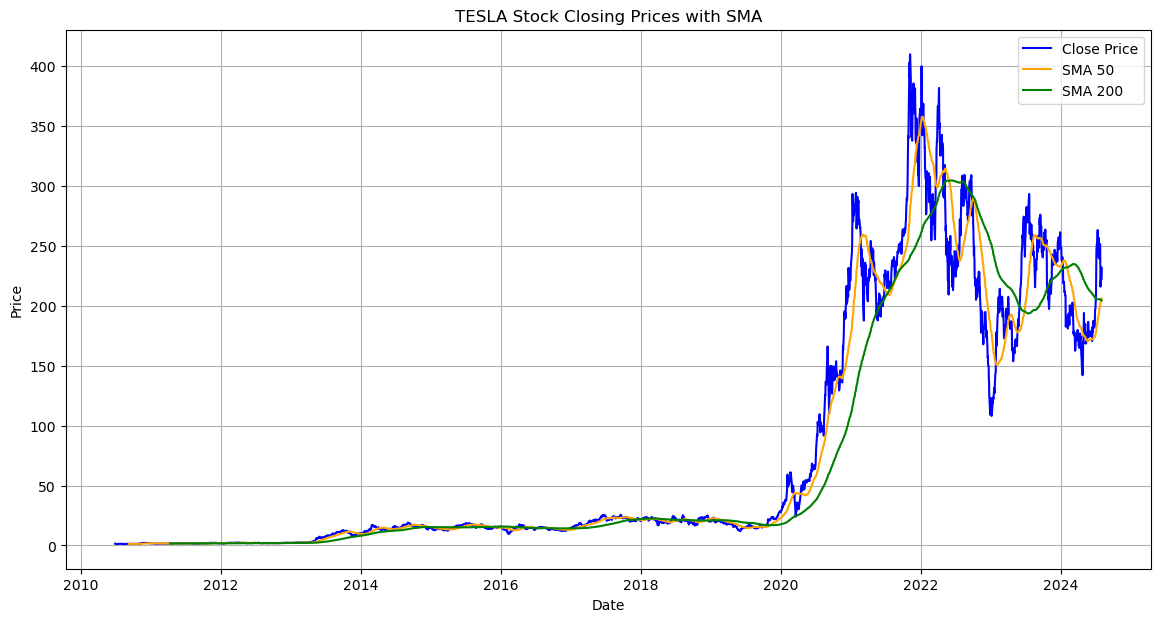

In [58]:
teslaSMA = indicators['TSLA']

teslaSMA['Date'] = pd.to_datetime(teslaSMA['Date'])
plt.figure(figsize=(14, 7))
plt.plot(teslaSMA['Date'], teslaSMA['Close'], label='Close Price', color='blue')
plt.plot(teslaSMA['Date'], teslaSMA['SMA_50'], label='SMA 50', color='orange')
plt.plot(teslaSMA['Date'], teslaSMA['SMA_200'], label='SMA 200', color='green')
plt.title('TESLA Stock Closing Prices with SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

### Exponential Moving Average (SMA)
#
Purpose: The same as SMA but gives more weights to recient prices 
# 
Usage: Identify short-term trends 

In [56]:
for name in names: 
    df = data[name] 

    # Calculate a 50-period simple moving average 
    df['EMA_50'] = ta.EMA(df['Close'], timeperiod=50)

    # Calculate a 200-period simple moving average 
    df['EMA_200'] = ta.EMA(df['Close'], timeperiod=200)

    indicators[name] = df

# desplay the last data last ten raws after modification 
indicators[name].tail(10)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200,EMA_50,EMA_200
3535,2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800,0.0,0.0,195.6922,205.57725,206.199933,202.439354
3536,2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000,0.0,0.0,196.9816,205.57230,207.887386,202.904933
3537,2024-07-19,247.789993,249.440002,236.830002,239.199997,239.199997,87403900,0.0,0.0,198.2094,205.51030,209.115332,203.266078
3538,2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400,0.0,0.0,199.7452,205.53520,210.777867,203.746117
3539,2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200,0.0,0.0,201.2334,205.46130,212.174030,204.170334
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,202.1838,205.24100,212.323676,204.287943
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,203.1510,205.03960,212.634512,204.446769
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,203.9960,204.84025,212.915512,204.599538
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,205.1582,204.68265,213.667845,204.873174
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,206.1138,204.48080,214.018909,205.049760


### Analysis of EMA Results
1. Calculation: The EMA is calculated using a formula that applies a weighting factor to the most recent price data. For this analysis, two EMAs are calculated:
- EMA_50: A 50-period EMA, which provides a medium-term trend.
- EMA_200: A 200-period EMA, which provides a long-term trend.
2. Trend Identification: Similar to the SMA, the EMA helps in identifying trends in the price data.
- If the EMA_50 is above the EMA_200, it typically indicates a bullish trend, suggesting that the stock's price is increasing.
- Conversely, if the EMA_50 is below the EMA_200, it indicates a bearish trend, suggesting that the stock's price is decreasing.
3. Crossovers:in the EMA can also signal potential trading opportunities.
- A bullish crossover occurs when the EMA_50 crosses above the EMA_200, indicating a potential buying opportunity.
- A bearish crossover occurs when the EMA_50 crosses below the EMA_200, indicating a potential selling opportunity.
4. Sensitivity to Price Changes: The EMA reacts more quickly to price changes than the SMA due to its weighting of recent prices. This can provide earlier signals but may also lead to more false signals in volatile markets.
- Recent Prices: The closing price on July 17, 2024, is 248.50, and on July 18, 2024, it is 251.09.
5. EMA Values: The EMA_50 is around 204.44, and the EMA_200 is around 204.87.
- This indicates that the recent closing prices are significantly above both EMAs, suggesting a strong bullish trend.
## Conclusion
#
The EMA is a valuable tool for traders and analysts to assess market trends and make informed decisions. Its responsiveness to recent price changes allows for quicker reactions to market movements compared to the SMA. However, like the SMA, it is essential to combine EMA analysis with other indicators and market factors for a more comprehensive trading strategy. The use of both EMAs and SMAs can provide a more nuanced view of market trends and potential trading opportunities.

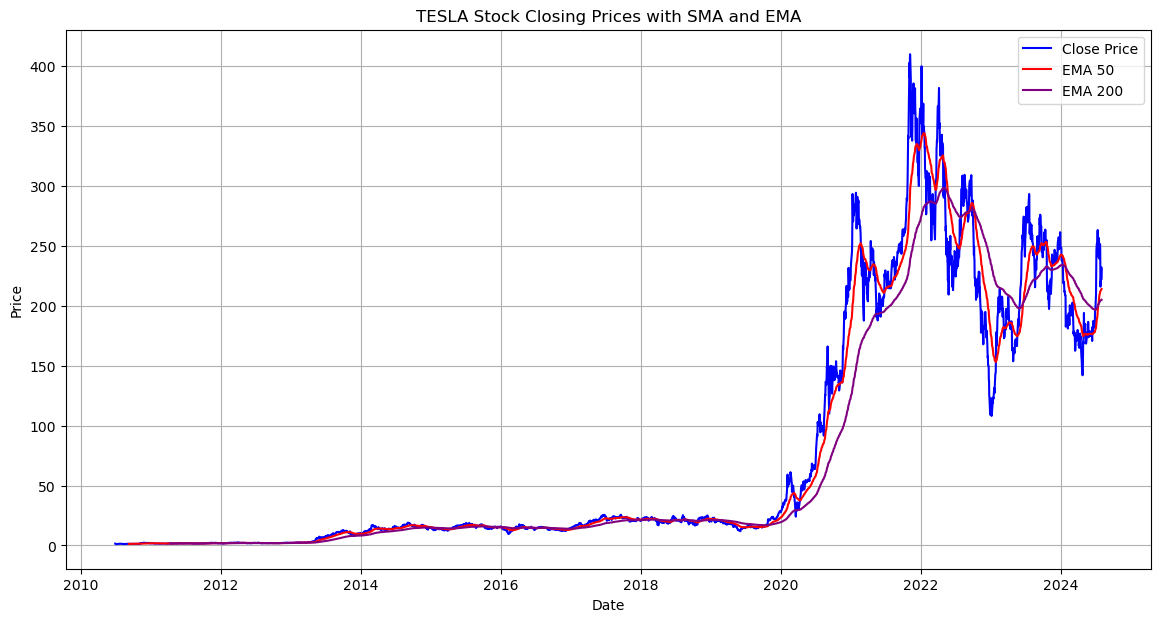

In [59]:
teslaEMA = indicators['TSLA']
teslaEMA['Date'] = pd.to_datetime(teslaEMA['Date'])
plt.figure(figsize=(14, 7))
plt.plot(teslaEMA['Date'], teslaEMA['Close'], label='Close Price', color='blue')
plt.plot(teslaEMA['Date'], teslaEMA['EMA_50'], label='EMA 50', color='red')
plt.plot(teslaEMA['Date'], teslaEMA['EMA_200'], label='EMA 200', color='purple')
plt.title('TESLA Stock Closing Prices with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

### Relative Strength Index (RSI)
#
Purpose: Meansures momentum and identifies overbought/oversold conditions 
# 
Usage: to detect market reversals If RSI > 70, the market is `overbought`. if RSI < 30, the market is `oversold`.

In [61]:
for name in names: 
    df = data[name] 

    # Calculate a 14-period simple moving average 
    df['RSI'] = ta.RSI(df['Close'], timeperiod=14)

    indicators[name] = df

# desplay the last data last 10 raws after modification 
indicators[name].tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200,EMA_50,EMA_200,RSI
3535,2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800,0.0,0.0,195.6922,205.57725,206.199933,202.439354,65.715141
3536,2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000,0.0,0.0,196.9816,205.57230,207.887386,202.904933,66.005487
3537,2024-07-19,247.789993,249.440002,236.830002,239.199997,239.199997,87403900,0.0,0.0,198.2094,205.51030,209.115332,203.266078,58.655486
3538,2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400,0.0,0.0,199.7452,205.53520,210.777867,203.746117,63.959876
3539,2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200,0.0,0.0,201.2334,205.46130,212.174030,204.170334,60.477660
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,202.1838,205.24100,212.323676,204.287943,44.886918
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,203.1510,205.03960,212.634512,204.446769,46.951389
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,203.9960,204.84025,212.915512,204.599538,46.752165
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,205.1582,204.68265,213.667845,204.873174,52.664511
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,206.1138,204.48080,214.018909,205.049760,48.220474


## Analysis of Relative Strength Index (RSI) Results

1. **Calculation**
The RSI is calculated using the average gains and average losses over a specified period, typically 14 periods. The formula for RSI is:

\[
RSI = 100 - \left( \frac{100}{1 + RS} \right)
\]

Where:
- **RS** (Relative Strength) is the ratio of the average of **n** days' up closes to the average of **n** days' down closes.

2. **Trend Identification**
The RSI is used to identify overbought or oversold conditions in the market:
- **Overbought Condition**: An RSI above 70 typically indicates that the market is overbought, suggesting that the stock may be due for a price correction.
- **Oversold Condition**: An RSI below 30 typically indicates that the market is oversold, suggesting that the stock may be undervalued and could experience a price increase.

3. **Divergence**
Divergence between the RSI and the price action can signal potential reversals:
- **Bullish Divergence**: Occurs when the price makes a new low, but the RSI makes a higher low, indicating potential upward momentum.
- **Bearish Divergence**: Occurs when the price makes a new high, but the RSI makes a lower high, indicating potential downward momentum.

4. **Sensitivity to Price Changes**
The RSI is sensitive to price changes and can provide early signals of potential reversals. However, it can also generate false signals in volatile markets, especially when the market is trending strongly.

5. **Recent Prices**
- **Closing Price (July 17, 2024)**: 248.50
- **Closing Price (July 18, 2024)**: 251.09

The RSI values for these dates can indicate whether the stock is approaching overbought or oversold conditions.

 **RSI Values**
The RSI value calculated for the recent data indicates the momentum of the stock. For example:
- **RSI = 63.96**: This suggests that the stock is approaching overbought territory but is not yet there.

 6. **Conclusion**
The RSI is a valuable tool for traders and analysts to assess market momentum and identify potential reversal points. By analyzing the RSI data, one can make informed decisions about entry and exit points based on overbought and oversold conditions.
However, it is essential to combine RSI analysis with other indicators and market factors for a more comprehensive trading strategy. The use of the RSI alongside other indicators like **Simple Moving Averages (SMAs)** and **Exponential Moving Averages (EMAs)** can provide a more nuanced view of market trends and potential trading opportunities.



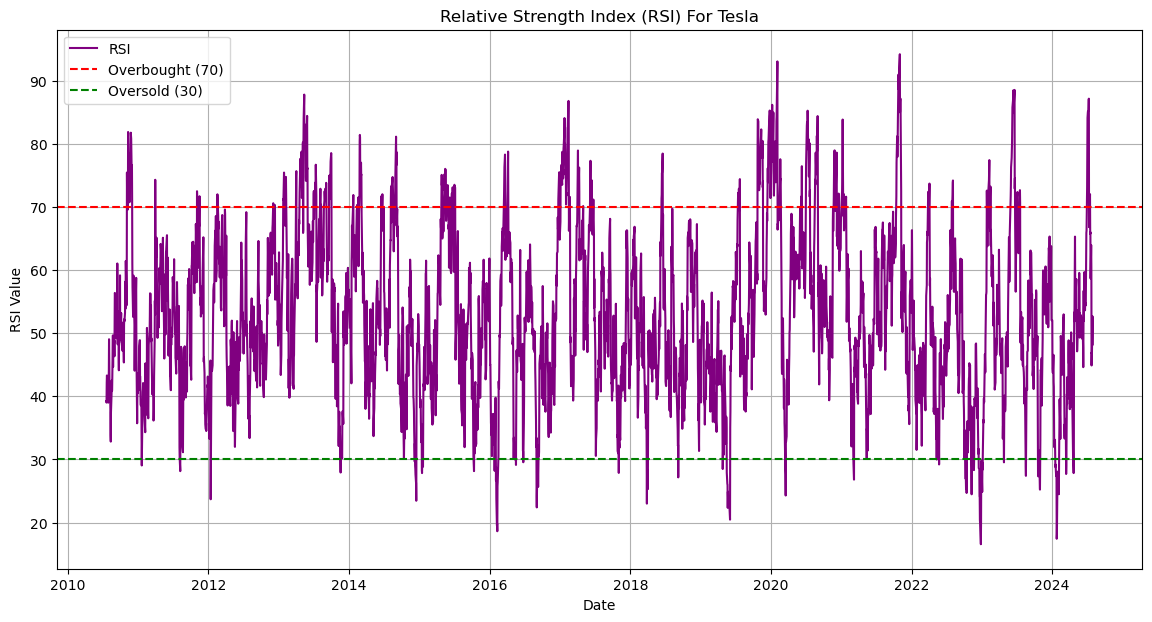

In [62]:
temp_data = indicators['TSLA'] 
plt.figure(figsize=(14, 7))
plt.plot(temp_data['Date'], temp_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) For Tesla')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid()
plt.show()

### Moving Average Convergence Divergence (MACD)
#
Purpose: Measures the differnce between fast and slow EMAs to detect momentum shifts
# 
Usage: to detect momentum shifts and crossovers (bullish/bearish signals).

In [64]:
for name in names: 
    df = data[name] 

    # Calculate MACD
    df['MACD'], df['MACD_SIGNAL'], df['MACD_HIST'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

    indicators[name] = df

# desplay the last data last 10 raws after modification 
indicators[name].tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200,EMA_50,EMA_200,RSI,MACD,MACD_SIGNAL,MACD_HIST
3535,2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800,0.0,0.0,195.6922,205.57725,206.199933,202.439354,65.715141,19.134324,17.754460,1.379865
3536,2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000,0.0,0.0,196.9816,205.57230,207.887386,202.904933,66.005487,18.309263,17.865420,0.443843
3537,2024-07-19,247.789993,249.440002,236.830002,239.199997,239.199997,87403900,0.0,0.0,198.2094,205.51030,209.115332,203.266078,58.655486,16.654081,17.623152,-0.969071
3538,2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400,0.0,0.0,199.7452,205.53520,210.777867,203.746117,63.959876,16.149490,17.328420,-1.178930
3539,2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200,0.0,0.0,201.2334,205.46130,212.174030,204.170334,60.477660,15.160886,16.894913,-1.734027
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,202.1838,205.24100,212.323676,204.287943,44.886918,11.789291,15.873789,-4.084498
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,203.1510,205.03960,212.634512,204.446769,46.951389,9.353206,14.569672,-5.216466
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,203.9960,204.84025,212.915512,204.599538,46.752165,7.302106,13.116159,-5.814053
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,205.1582,204.68265,213.667845,204.873174,52.664511,6.593101,11.811547,-5.218447
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,206.1138,204.48080,214.018909,205.049760,48.220474,5.206237,10.490485,-5.284248


# Analysis of Moving Average Convergence Divergence (MACD) Results

1. **Calculation**
The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA. The formula for MACD is:

\[
MACD = EMA_{12} - EMA_{26}
\]

Additionally, a 9-period EMA of the MACD is calculated to create the **MACD Signal line**, which is used for generating buy and sell signals.

---

2. **Trend Identification**
The MACD helps in identifying the **direction and strength of the trend**:
- **Bullish Trend**: When the MACD line is above the MACD Signal line, it typically indicates a bullish trend, suggesting that the stock's price is increasing.
- **Bearish Trend**: When the MACD line is below the MACD Signal line, it indicates a bearish trend, suggesting that the stock's price is decreasing.

---

3. **Crossovers**
Crossovers in the MACD can signal potential trading opportunities:
- **Bullish Crossover**: Occurs when the MACD line crosses **above** the MACD Signal line, indicating a potential buying opportunity.
- **Bearish Crossover**: Occurs when the MACD line crosses **below** the MACD Signal line, indicating a potential selling opportunity.

---

4. **Divergence**
Divergence between the MACD and the price action can signal potential reversals:
- **Bullish Divergence**: Occurs when the price makes a new low, but the MACD makes a higher low, indicating potential upward momentum.
- **Bearish Divergence**: Occurs when the price makes a new high, but the MACD makes a lower high, indicating potential downward momentum.

---
5. **Sensitivity to Price Changes**
The MACD is sensitive to price changes and can provide early signals of potential trend shifts. However, it can also generate **false signals** in volatile markets, especially when the market is trending strongly.

---

6. **Recent Values**
The MACD values calculated for the recent data can indicate the momentum of the stock:
- **Positive and Increasing MACD**: Suggests strong bullish momentum.
- **Negative and Decreasing MACD**: Suggests bearish momentum.

---

7. **Conclusion**
The MACD is a valuable tool for traders and analysts to assess market momentum and identify potential trading opportunities. Its ability to highlight trends and crossovers makes it a popular choice among traders.
However, like other indicators, it is essential to combine MACD analysis with other indicators and market factors for a more comprehensive trading strategy. The use of MACD alongside indicators like **Simple Moving Averages (SMAs)**, **Exponential Moving Averages (EMAs)**, and **Relative Strength Index (RSI)** can provide a more nuanced view of market trends and potential trading opportunities.



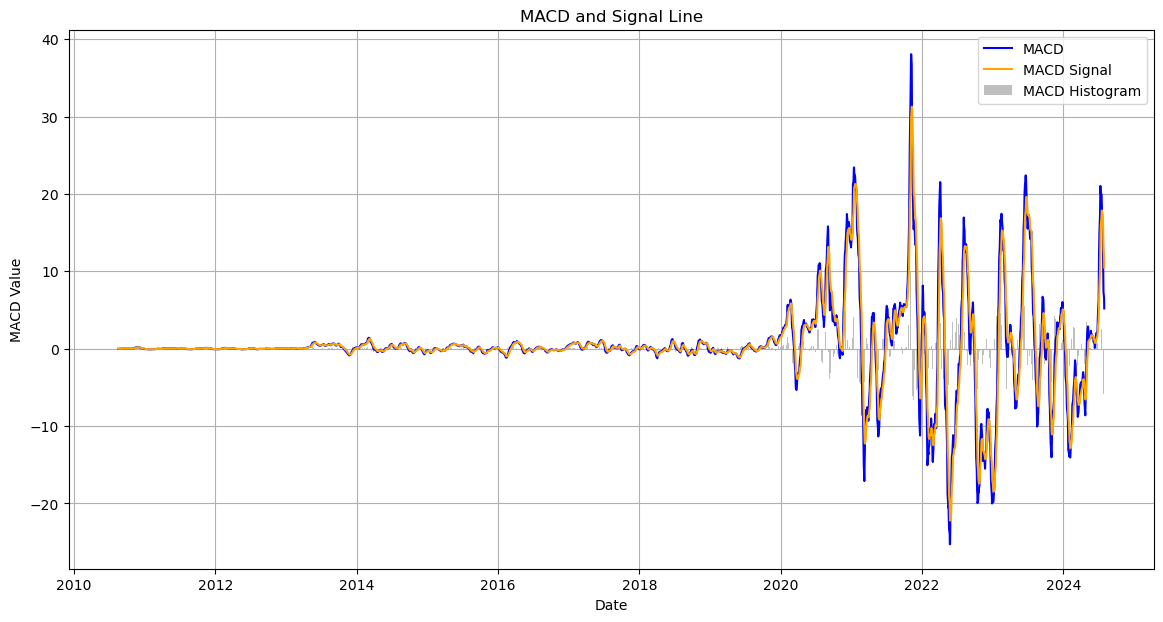

In [65]:
temp_data = indicators['TSLA']
plt.figure(figsize=(14, 7))
plt.plot(temp_data['Date'], temp_data['MACD'], label='MACD', color='blue')
plt.plot(temp_data['Date'], temp_data['MACD_SIGNAL'], label='MACD Signal', color='orange')
plt.bar(temp_data['Date'], temp_data['MACD_HIST'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid()
plt.show()

### Bollinger Bands (BBANDS)
#
Purpose: Measures price volatility using upper, middle, and lower bands.
# 
Usage: to detect periods of high or low volatility. Price near the upper band may signal **overbought**, while price near the lower band may signal **Overslod** 

In [66]:
for name in names: 
    df = data[name] 

    # Calculate Bollinger Bands
    df['BBANDS_UPPER'], df['BBANDS_MIDDLE'], df['BBANDS_LOWER'] = ta.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    indicators[name] = df

# desplay all the data after modification 
indicators[name].tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200,EMA_50,EMA_200,RSI,MACD,MACD_SIGNAL,MACD_HIST,BBANDS_UPPER,BBANDS_MIDDLE,BBANDS_LOWER
3535,2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800,0.0,0.0,195.6922,205.57725,206.199933,202.439354,65.715141,19.134324,17.754460,1.379865,285.324050,223.778000,162.231950
3536,2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000,0.0,0.0,196.9816,205.57230,207.887386,202.904933,66.005487,18.309263,17.865420,0.443843,286.772080,226.996500,167.220920
3537,2024-07-19,247.789993,249.440002,236.830002,239.199997,239.199997,87403900,0.0,0.0,198.2094,205.51030,209.115332,203.266078,58.655486,16.654081,17.623152,-0.969071,286.065005,229.877999,173.690993
3538,2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400,0.0,0.0,199.7452,205.53520,210.777867,203.746117,63.959876,16.149490,17.328420,-1.178930,285.879836,233.302999,180.726162
3539,2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200,0.0,0.0,201.2334,205.46130,212.174030,204.170334,60.477660,15.160886,16.894913,-1.734027,283.856028,236.492999,189.129970
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,202.1838,205.24100,212.323676,204.287943,44.886918,11.789291,15.873789,-4.084498,280.774991,237.924999,195.075007
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,203.1510,205.03960,212.634512,204.446769,46.951389,9.353206,14.569672,-5.216466,278.457743,239.118999,199.780256
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,203.9960,204.84025,212.915512,204.599538,46.752165,7.302106,13.116159,-5.814053,275.866801,240.238000,204.609199
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,205.1582,204.68265,213.667845,204.873174,52.664511,6.593101,11.811547,-5.218447,272.150106,241.949000,211.747894
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,206.1138,204.48080,214.018909,205.049760,48.220474,5.206237,10.490485,-5.284248,270.502227,242.587000,214.671772


### Analysis of Bollinger Bands (BBANDS) Results

1. **Calculation**
Bollinger Bands consist of three lines:
- **Middle Band**: The 20-period Simple Moving Average (SMA) of the closing prices.
- **Upper Band**: Calculated as the Middle Band plus two standard deviations of the closing prices over the same period.
- **Lower Band**: Calculated as the Middle Band minus two standard deviations of the closing prices over the same period.

The formulae are as follows:

\[
Upper\ Band = SMA_{20} + (2 \times Standard\ Deviation)
\]

\[
Lower\ Band = SMA_{20} - (2 \times Standard\ Deviation)
\]

---

2. **Trend Identification**
Bollinger Bands help in identifying **volatility and potential price trends**:
- **Overbought Condition**: When the price is near the upper band, it may indicate that the asset is overbought, suggesting a potential price correction.
- **Oversold Condition**: When the price is near the lower band, it may indicate that the asset is oversold, suggesting a potential price increase.

---

3. **Volatility Measurement**
The width of the bands varies with market volatility:
- **Wider Band**: Indicates higher volatility.
- **Narrower Band**: Indicates lower volatility.

Traders often look for periods of low volatility (narrow bands) followed by a breakout, which can signal a strong price movement.

---

4. **Price Action Relative to Bands**
The price’s relationship with the Bollinger Bands provides insight into market trends:
- If the price consistently touches the **upper band**, it may indicate a strong **bullish trend**.
- If the price consistently touches the **lower band**, it may indicate a strong **bearish trend**.

---

5. **Recent Prices**
The closing prices relative to the Bollinger Bands can provide insights into market conditions:
- If the price is consistently near the **upper band**, it suggests that the market is in a strong **uptrend**.
- If the price is consistently near the **lower band**, it suggests a possible **downtrend** or **oversold condition**.

---

6. **Bollinger Band Values**
The values of the **upper**, **middle**, and **lower bands** calculated for recent data can indicate the current market conditions:
- If the price is approaching the **upper band**, it may signal **overbought conditions**.
- If the price is approaching the **lower band**, it may signal **oversold conditions**.

---

7. **Conclusion**
Bollinger Bands are a valuable tool for traders and analysts to assess **market volatility** and identify potential trading opportunities. By analyzing the position of the price relative to the bands, traders can make informed decisions about **entry and exit points**.
However, it is essential to combine Bollinger Bands analysis with other indicators and market factors for a more comprehensive trading strategy. The use of Bollinger Bands alongside indicators like **Simple Moving Averages (SMAs)**, **Exponential Moving Averages (EMAs)**, and **Relative Strength Index (RSI)** can provide a more nuanced view of market trends and potential trading opportunities.



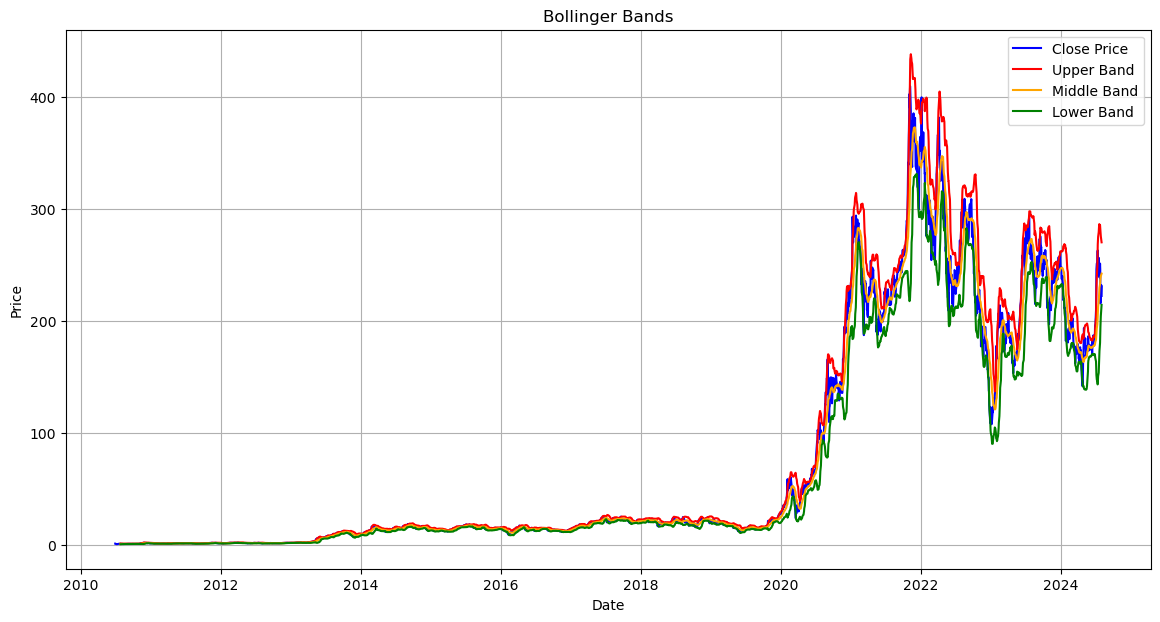

In [67]:
temp_data = indicators['TSLA']
plt.figure(figsize=(14, 7))
plt.plot(temp_data['Date'], temp_data['Close'], label='Close Price', color='blue')
plt.plot(temp_data['Date'], temp_data['BBANDS_UPPER'], label='Upper Band', color='red')
plt.plot(temp_data['Date'], temp_data['BBANDS_MIDDLE'], label='Middle Band', color='orange')
plt.plot(temp_data['Date'], temp_data['BBANDS_LOWER'], label='Lower Band', color='green')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

### On-Balance Volume (OBV)
#
Purpose: Measures buying and selling pressure using price and volume. 
# 
Usage: to detect momentum shifts related to volume. When OBV rises, buying pressure is strong. when OBV falls. selling pressure is strong.

In [41]:
for name in names: 
    df = data[name] 

    # Calculate On Balance Volume
    df['OBV'] = ta.OBV(df['Close'], df['Volume'])

    indicators[name] = df

# desplay all the data after modification 
indicators[name].tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,...,EMA_50,EMA_200,RSI,MACD,MACD_SIGNAL,MACD_HIST,BBANDS_UPPER,BBANDS_MIDDLE,BBANDS_LOWER,OBV
3535,2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800,0.0,0.0,195.6922,...,206.199933,202.439354,65.715141,19.134324,17.754460,1.379865,285.324050,223.778000,162.231950,2.095135e+10
3536,2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000,0.0,0.0,196.9816,...,207.887386,202.904933,66.005487,18.309263,17.865420,0.443843,286.772080,226.996500,167.220920,2.106221e+10
3537,2024-07-19,247.789993,249.440002,236.830002,239.199997,239.199997,87403900,0.0,0.0,198.2094,...,209.115332,203.266078,58.655486,16.654081,17.623152,-0.969071,286.065005,229.877999,173.690993,2.097481e+10
3538,2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400,0.0,0.0,199.7452,...,210.777867,203.746117,63.959876,16.149490,17.328420,-1.178930,285.879836,233.302999,180.726162,2.107604e+10
3539,2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200,0.0,0.0,201.2334,...,212.174030,204.170334,60.477660,15.160886,16.894913,-1.734027,283.856028,236.492999,189.129970,2.096411e+10
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,202.1838,...,212.323676,204.287943,44.886918,11.789291,15.873789,-4.084498,280.774991,237.924999,195.075007,2.079617e+10
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,203.1510,...,212.634512,204.446769,46.951389,9.353206,14.569672,-5.216466,278.457743,239.118999,199.780256,2.089680e+10
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,203.9960,...,212.915512,204.599538,46.752165,7.302106,13.116159,-5.814053,275.866801,240.238000,204.609199,2.080220e+10
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,205.1582,...,213.667845,204.873174,52.664511,6.593101,11.811547,-5.218447,272.150106,241.949000,211.747894,2.093140e+10
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,206.1138,...,214.018909,205.049760,48.220474,5.206237,10.490485,-5.284248,270.502227,242.587000,214.671772,2.083084e+10


### Analysis of On-Balance Volume (OBV) Results
1. **Calculation**
The On-Balance Volume (OBV) is a momentum indicator that uses volume flow to predict changes in stock price. The calculation is straightforward:

- **If the closing price of the current period is higher** than the previous period, the OBV is calculated as:
  \[ 
  OBV = OBV_{previous} + Volume 
  \]

- **If the closing price is lower** than the previous period, the OBV is calculated as:
  \[ 
  OBV = OBV_{previous} - Volume 
  \]

- **If the closing price is unchanged**, the OBV remains the same.

---

2. **Trend Identification**
OBV helps in identifying the strength of a price trend based on volume:
- **Increasing OBV**: Indicates that volume is flowing into the asset, suggesting a **bullish trend**.
- **Decreasing OBV**: Indicates that volume is flowing out of the asset, suggesting a **bearish trend**.

---

3. **Divergence**
Divergence between the OBV and price action can signal potential reversals:
- **Bullish Divergence**: Occurs when the price makes a new low, but the OBV makes a higher low, indicating potential **upward momentum**.
- **Bearish Divergence**: Occurs when the price makes a new high, but the OBV makes a lower high, indicating potential **downward momentum**.

---

4. **Volume Confirmation**
OBV can be used to confirm price trends:
- **Rising Price & Rising OBV**: Confirms the strength of the **uptrend**.
- **Rising Price & Falling OBV**: May indicate a **weakening trend** and potential reversal.

---

5. **Recent Values**
The OBV values calculated for the recent data can indicate the **buying and selling pressure** in the market:
- **Increasing OBV & Increasing Price**: Suggests strong **buying interest**.
- **Decreasing OBV & Decreasing Price**: Suggests strong **selling pressure**.

---

6. **OBV Interpretation**
- A **rising OBV** suggests that the stock is being **accumulated**.
- A **falling OBV** suggests **distribution**.

Traders often look for significant changes in OBV to anticipate potential price movements.

---

7. **Conclusion**
On-Balance Volume (OBV) is a valuable tool for traders and analysts to assess **market momentum** and identify potential trading opportunities based on volume trends. By analyzing the OBV data, one can make informed decisions about **entry and exit points** based on buying and selling pressure. 
However, it is essential to combine OBV analysis with other indicators and market factors for a more comprehensive trading strategy. The use of OBV alongside indicators like **Simple Moving Averages (SMAs)**, **Exponential Moving Averages (EMAs)**, and **Relative Strength Index (RSI)** can provide a more nuanced view of market trends and potential trading opportunities.




### Average True Range (ATR)
#
Purpose: Measure market volatility by examining price ranges. 
# 
Usage: to measure market volatility. High ATR indicates high volatility, while low ATR indicates low volatility. 

In [42]:
for name in names: 
    df = data[name] 

    df['ATR'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)

    indicators[name] = df

# desplay all the data after modification 
indicators[name].tail(10)



,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,...,EMA_200,RSI,MACD,MACD_SIGNAL,MACD_HIST,BBANDS_UPPER,BBANDS_MIDDLE,BBANDS_LOWER,OBV,ATR
3535,2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800,0.0,0.0,195.6922,...,202.439354,65.715141,19.134324,17.754460,1.379865,285.324050,223.778000,162.231950,2.095135e+10,12.560147
3536,2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000,0.0,0.0,196.9816,...,202.904933,66.005487,18.309263,17.865420,0.443843,286.772080,226.996500,167.220920,2.106221e+10,12.372995
3537,2024-07-19,247.789993,249.440002,236.830002,239.199997,239.199997,87403900,0.0,0.0,198.2094,...,203.266078,58.655486,16.654081,17.623152,-0.969071,286.065005,229.877999,173.690993,2.097481e+10,12.389924
3538,2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400,0.0,0.0,199.7452,...,203.746117,63.959876,16.149490,17.328420,-1.178930,285.879836,233.302999,180.726162,2.107604e+10,12.505644
3539,2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200,0.0,0.0,201.2334,...,204.170334,60.477660,15.160886,16.894913,-1.734027,283.856028,236.492999,189.129970,2.096411e+10,12.335954
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,202.1838,...,204.287943,44.886918,11.789291,15.873789,-4.084498,280.774991,237.924999,195.075007,2.079617e+10,13.716958
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,203.1510,...,204.446769,46.951389,9.353206,14.569672,-5.216466,278.457743,239.118999,199.780256,2.089680e+10,13.452174
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,203.9960,...,204.599538,46.752165,7.302106,13.116159,-5.814053,275.866801,240.238000,204.609199,2.080220e+10,12.987733
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,205.1582,...,204.873174,52.664511,6.593101,11.811547,-5.218447,272.150106,241.949000,211.747894,2.093140e+10,13.093610
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,206.1138,...,205.049760,48.220474,5.206237,10.490485,-5.284248,270.502227,242.587000,214.671772,2.083084e+10,13.044781


### Analysis of Average True Range (ATR) Results

1. **Calculation**
The Average True Range (ATR) measures market volatility by examining price ranges. It is calculated using the following steps:

- **True Range (TR)**: The greatest of the following:
  - Current High minus Current Low
  - Current High minus Previous Close (absolute value)
  - Current Low minus Previous Close (absolute value)

- **ATR Calculation**: The ATR is then calculated as the average of the True Range over a specified period, typically 14 periods.

---

2. **Volatility Measurement**
The ATR provides insights into **market volatility**:
- **High ATR**: Indicates high volatility, suggesting that the price is experiencing significant fluctuations.
- **Low ATR**: Indicates low volatility, suggesting that the price is relatively stable.

---

3. **Trend Identification**
While ATR does not indicate the direction of the trend, it helps traders understand the strength of price movements:
- **Rising ATR**: Suggests increasing volatility, which may indicate a potential breakout or significant price movement.
- **Falling ATR**: Suggests decreasing volatility, which may indicate a consolidation phase or a potential reversal.

---

4. **Risk Management**
ATR is often used in risk management to set stop-loss orders:
- Traders may set stop-loss levels based on a multiple of the ATR to account for market volatility. 
- For example, a stop-loss might be set at 1.5 times the ATR below the entry price in a long position.

---

5. **Recent Values**
The ATR values calculated for the recent data can indicate the **current market conditions**:
- **Increasing ATR**: Suggests that traders should be prepared for larger price swings.
- **Decreasing ATR**: Suggests more stable market conditions.

---

6. **ATR Interpretation**
- The ATR does not provide buy or sell signals but is a useful tool for assessing market conditions.
- A trader might interpret a **high ATR** as a signal to be cautious or to adjust their trading strategy accordingly.

---

7. **Conclusion**
The Average True Range (ATR) is a valuable tool for traders and analysts to measure **market volatility** and assess potential price movements. By analyzing the ATR data, one can make informed decisions about **risk management and position sizing**. 

However, it is essential to combine ATR analysis with other indicators and market factors for a more comprehensive trading strategy. The use of ATR alongside indicators like **Simple Moving Averages (SMAs)**, **Exponential Moving Averages (EMAs)**, and **Relative Strength Index (RSI)** can provide a more nuanced view of market trends and potential trading opportunities.

